In [1]:
import numpy
import scipy.io
import matplotlib.pyplot as mp
import matplotlib.cm as cm

mp.rcParams.update({'mathtext.default': 'regular'}) # use helvetica in default plot

% matplotlib inline

In [2]:
file_root = './'
file_name = 'workspace_variables_for_CWV_precip_stats_GOAmazon.mat'
matfile = scipy.io.loadmat(file_root + file_name)

In [3]:
# print the 'keys' in the matfile
matfile.keys()

dict_keys(['errorbar_freq', 'pdf_gt05mmhr', '__version__', 'nanstderr', 'pdf_all', '__header__', '__globals__', 'aosmet_precip_15minavgs_binned', 'prec_percentage_gt05mmhr'])

In [4]:
pdf_gt05mmhr = matfile['pdf_gt05mmhr']
nanstderr = matfile['nanstderr']
aosmet_precip_15minavgs_binned = matfile['aosmet_precip_15minavgs_binned']
pdf_all = matfile['pdf_all']
prec_percentage_gt05mmhr = matfile['prec_percentage_gt05mmhr']
errorbar_freq = matfile['errorbar_freq']

bin_step = 1.5
bin_center = numpy.arange(28.75, 69.25+bin_step, bin_step)

In [5]:
# create color map
# choose from maps here:
# http://matplotlib.org/examples/color/colormaps_reference.html
nbins = bin_center.size
scatter_colors = cm.plasma(numpy.linspace(0,1,nbins+1,endpoint=True))

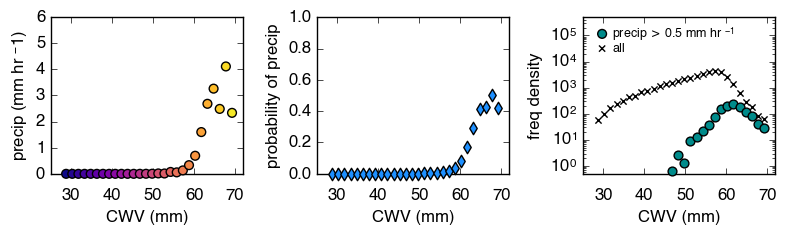

In [6]:
axes_fontsize = 12 # size of font in all plots
legend_fontsize = 9
marker_size = 40 # size of markers in scatter plots
xtick_pad = 10 # padding between x tick labels and actual plot



# create figure canvas
fig = mp.figure(figsize=(8,2.5))



# create figure 1
ax1 = fig.add_subplot(131)
ax1.set_xlim(25,72)
ax1.set_ylim(0,6)
ax1.set_xticks([30,40,50,60,70])
ax1.set_yticks([0,1,2,3,4,5,6])
ax1.tick_params(labelsize=axes_fontsize)
ax1.tick_params(axis='x', pad=10)
ax1.scatter(bin_center, aosmet_precip_15minavgs_binned, edgecolor='0', facecolor=scatter_colors, s=marker_size, clip_on=False, zorder=3)
ax1.set_ylabel('precip (mm hr $^\minus 1$)', fontsize=axes_fontsize)
ax1.set_xlabel('CWV (mm)', fontsize=axes_fontsize)
#ax1.grid()
ax1.set_axisbelow(True)



# create figure 2 (probability pickup)
ax2 = fig.add_subplot(132)
ax2.set_xlim(25,72)
ax2.set_ylim(0,1)
ax2.set_xticks([30,40,50,60,70])
ax2.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax2.tick_params(labelsize=axes_fontsize)
ax2.tick_params(axis='x', pad=xtick_pad)
ax2.scatter(bin_center, prec_percentage_gt05mmhr, marker='d', s=marker_size, edgecolor='0', facecolor='dodgerblue', clip_on=False, zorder=3)
ax2.set_ylabel('probability of precip', fontsize=axes_fontsize)
ax2.set_xlabel('CWV (mm)', fontsize=axes_fontsize)
#ax2.grid()
ax2.set_axisbelow(True)



# create figure 3 (non-normalized PDF)
ax3 = fig.add_subplot(133)
ax3.set_yscale('log')
ax3.set_ylim(5e-1, 5e5)
ax3.set_xlim(25,72)
ax3.set_xticks([30,40,50,60,70])
ax3.set_yticks(10**numpy.array((0,1,2,3,4,5)))
ax3.tick_params(labelsize=axes_fontsize)
ax3.tick_params(axis='x', pad=xtick_pad)
# yscale is log scale, so throw out any zero values
pdf_gt05mmhr[pdf_gt05mmhr==0] = numpy.nan
ax3.scatter(bin_center, pdf_gt05mmhr, edgecolor='0', facecolor='darkcyan', s=marker_size, clip_on=False, zorder=3, label='precip $>$ 0.5 mm hr $^{\minus 1}$')
ax3.scatter(bin_center, pdf_all, marker='x', color='0', label='all')
ax3.set_ylabel('freq density', fontsize=axes_fontsize)
ax3.set_xlabel('CWV (mm)', fontsize=axes_fontsize)
#ax3.grid()
ax3.set_axisbelow(True)

# create legend
legend_handles, legend_labels = ax3.get_legend_handles_labels()
ax3.legend(legend_handles, legend_labels, loc='upper left', bbox_to_anchor=(0.1,0.95), fontsize=legend_fontsize, scatterpoints=1, handlelength=0, labelspacing=0, borderpad=0, borderaxespad=0, frameon=False)



# set layout to tight (so that space between figures is minimized)
mp.tight_layout()
# save figure
mp.savefig('conv_diagnostics_example.pdf', transparent=True, bbox_inches='tight')